In [24]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

In [2]:
#load urls of images from Google Drive
image_x = "/content/drive/My Drive/ImageProcessing/x.png"
image_o = "/content/drive/My Drive/ImageProcessing/o.png"

size of the image:  (256, 256)  colour mode: RGB
size of the image:  (256, 256)  colour mode: RGB


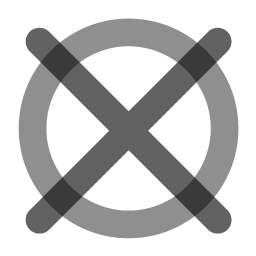

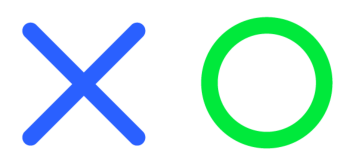

In [26]:
from PIL import Image, ImageChops, ImageFilter
from matplotlib import pyplot as plt

#Create a PIL Image objects
x = Image.open(image_x)
o = Image.open(image_o)

#Find out attributes of Image Objects
print('size of the image: ', x.size, ' colour mode:', x.mode)
print('size of the image: ', o.size, ' colour mode:', o.mode)

#plot 2 images one besides the other
plt.subplot(121), plt.imshow(x)
plt.axis('off')
plt.subplot(122), plt.imshow(o)
plt.axis('off')

#multiply images
merged = ImageChops.multiply(x,o)

#adding 2 images
add = ImageChops.add(x,o)

#convert colour mode
greyscale = merged.convert('L')
greyscale

In [31]:
#More Attributes
image = merged

print('image size: ' , image.size,
      '\ncolor mode: ' , image.mode,
      '\nimage width : ' , image.width, '| also represented by: ' , image.size[0],
      '\nimage height: ' , image.height, '| also represented by: ' , image.size[1],)

image size:  (256, 256) 
color mode:  RGB 
image width :  256 | also represented by:  256 
image height:  256 | also represented by:  256


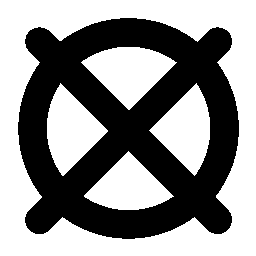

In [34]:
#mapping the pixels of the image so we can use them as coordinates
pixel = greyscale.load()

#a nested loop to parse through all the pixels in the image
for row in range(greyscale.size[0]):
  for column in range(greyscale.size[1]):
    if pixel[row, column] != (255):
      pixel[row,column] = (0)

greyscale

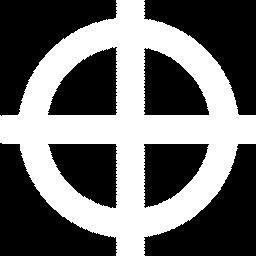

In [36]:
#1.invert image
invert = ImageChops.invert(greyscale)

#2.invert by subtraction
bg = Image.new('L', (256, 256), color=(255)) #create a new image with a solid white background
subt = ImageChops.subtract(bg, greyscale) #subtract image from background

#3. rotate
rotate = subt.rotate(45)
rotate

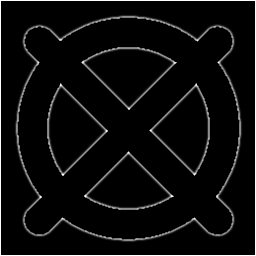

In [24]:
#gaussian blur
blur = greyscale.filter(ImageFilter.GaussianBlur(radius=1))

#edge detection
edge = blur.filter(ImageFilter.FIND_EDGES)
edge

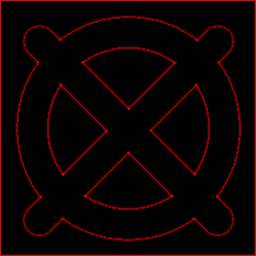

In [23]:
#change edge colours
edge = edge.convert('RGB')
bg_red = Image.new('RGB', (256,256), color=(255,0,0))

filled_edge = ImageChops.darker(bg_red, edge)
filled_edge

In [ ]:
#save image in the directory
edge.save('/content/drive/My Drive/ImageProcessing/processed.png')